### Text Classification

We will build our emotion detector from English Twitter messages

#### Huggingface Datasets

In [1]:
from datasets import list_datasets

In [2]:
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are {all_datasets[0:10]}")

There are 6119 datasets currently available on the Hub
The first 10 are ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [3]:
from datasets import load_dataset

In [4]:
emotions = load_dataset("emotion")

Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /home/jovyan/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
type(emotions)

datasets.dataset_dict.DatasetDict

In [7]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [8]:
len(train_ds)

16000

In [9]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [10]:
train_ds.column_names

['text', 'label']

In [11]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)}


In [12]:
train_ds['text'][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

#### Datasets not on the Hub

In [13]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?dl=1"
emotions_remote = load_dataset("csv", data_files = dataset_url, sep = ";", names = ["text", "label"])

Using custom data configuration default-88a3a10ec1a82da2


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /home/jovyan/.cache/huggingface/datasets/csv/default-88a3a10ec1a82da2/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
emotions_remote

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

#### EDA on the data

In [15]:
# from datasets to dataframes
import pandas as pd

In [16]:
emotions.set_format(type = "pandas")
df= emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
# convert the integer values of the label to corresponding label names
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [19]:
emotions["train"].features["label"]

ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)

In [20]:
df["label_name"] = df["label"].apply(label_int2str)

In [21]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [22]:
import matplotlib.pyplot as plt

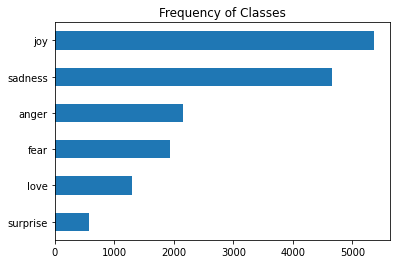

In [23]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

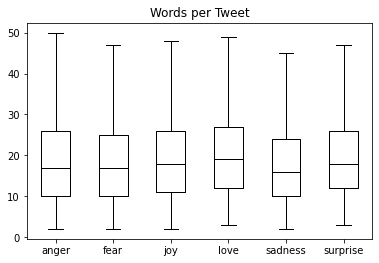

In [24]:
# How long are the tweets-
df["Words per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words per Tweet", by = "label_name", grid = False, showfliers = False, color = "black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [25]:
emotions.reset_format()

In [26]:
type(emotions)

datasets.dataset_dict.DatasetDict

#### Tokenization

##### Character tokenization

In [27]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [28]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [29]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [30]:
# We need to convert it to a one-hot encoding vector - (let's take a dummy example)

In [31]:
categorical_df = pd.DataFrame({"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0, 1, 2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [32]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


Adding two one-hot encodings can easily be interpreted. The two entities that are "hot" indicate that the corresponding tokens co-occur.
We will use PyTorch to convert these input_ids to a tensor and applying one_hot() function

In [33]:
import torch
import torch.nn.functional as F

In [34]:
input_ids = torch.tensor(input_ids)
input_ids

tensor([ 5, 14, 12,  8, 13, 11, 19, 11, 13, 10,  0, 17,  8, 18, 17,  0, 11, 16,
         0,  6,  0,  7, 14, 15,  8,  0, 17,  6, 16, 12,  0, 14,  9,  0,  3,  2,
         4,  1])

In [35]:
one_hot_encodings = F.one_hot(input_ids, num_classes = len(token2idx))

In [36]:
len(token2idx)

20

In [37]:
len(tokenized_text)

38

In [38]:
one_hot_encodings.shape
# 38: lenth of the tokenized_text at character level
# 20: the vocab size

torch.Size([38, 20])

In [39]:
#one_hot_encodings

In [40]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor Index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor Index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


##### Word Tokenization

In [41]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


##### Subword Tokenization

In [42]:
from transformers import AutoTokenizer

In [43]:
model_ckpt = 'distilbert-base-uncased'

In [44]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [45]:
text

'Tokenizing text is a core task of NLP.'

In [46]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [47]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [48]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [49]:
tokenizer.vocab_size

30522

In [50]:
tokenizer.model_max_length

512

In [51]:
# The names of the fields the model expects in its forward pass -
tokenizer.model_input_names

['input_ids', 'attention_mask']

##### Tokenizing the Whole Dataset

In [52]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [53]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [54]:
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
tokens2ids

[('[UNK]', 100), ('[SEP]', 102), ('[PAD]', 0), ('[CLS]', 101), ('[MASK]', 103)]

In [55]:
data = sorted(tokens2ids, key = lambda x: x[-1])
data

[('[PAD]', 0), ('[UNK]', 100), ('[CLS]', 101), ('[SEP]', 102), ('[MASK]', 103)]

In [56]:
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [57]:
emotions['train'].column_names

['text', 'label']

In [58]:
# Applying the processing function across all the splits in the corpus -
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
# batched = True will encode the tweets in batches. As we have set batch_size = None, our tokenize() function will be applied on the full dataset as a single batch.
# This operation will add new input_id and attention_mask columns to the dataset

Parameter 'function'=<function tokenize at 0x7f084c1bd0d0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [59]:
print(emotions_encoded['train'].column_names)

['attention_mask', 'input_ids', 'label', 'text']


## Training a Text Classifier

For the pretraining objective of the language modeling, each hidden state is fed to a layer that predicts the masked input tokens. For the classification task, we replace the language modeling layer with a classification layer.

Here we have two options to train this model on our Twitter dataset -

1. Feature Extraction : We use the hidden states as features and just train a classifier on them without modifying the pre-trained model.
2. Fine Tuning : We train the whole model end-to-end which also updates the parameters of the pre-trained model.

#### Transformer as Feature Extractors
Here we freeze the body's weights during the training and use the hidden states as features for the classifiers. The classifier could be a simple one.
In this case let's use the DistilBERT checkpoint to load the AutoModel class.

In [60]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [61]:
device

device(type='cuda')

In [62]:
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


##### Extracting the last hidden states

Just to warm up, let's retrieve the last hidden states for a single string. We first encode the string and convert the tokens to PyTorch tensors.

In [63]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors="pt")
print(f"Input Tensor Shape: {inputs['input_ids'].size()}")

Input Tensor Shape: torch.Size([1, 6])


The resulting tensor has the shape [batch_size, n_tokens]. Now that we have the encodings as a tensor, the final step is to place them on the same device as the model and pass the inputs as follows -

In [64]:
inputs = {k:v.to(device) for k, v in inputs.items()}
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [65]:
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


The model output is an instance of BaseModelOutput, and we can simply access its attributes by name

In [66]:
outputs.last_hidden_state.size() # [batch_size, n_tokens, hidden_dim]

torch.Size([1, 6, 768])

For classification task, it is common practice to just use the hidden state associated with the [CLS] token as the input feature. Since this token appears at the start of each sequence,
we can extract it by simply indexing into as follows -

In [67]:
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

Now that we know how to get the last hidden state for a single string, let's do the same for the entire dataset by creating a new hidden_state column that stores all these vectors.

In [68]:
def extract_hidden_states(batch):
    # Place the model inputs on the GPU
    inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    # Extract last hidden states 
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # return vector for [CLS] token -
    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

In [69]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [70]:
emotions_encoded.set_format("torch", columns = ["input_ids", "attention_mask", "label"])

In [71]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'input_ids', 'label', 'text'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['attention_mask', 'input_ids', 'label', 'text'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['attention_mask', 'input_ids', 'label', 'text'],
        num_rows: 2000
    })
})

In [72]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)
# Note that we did not set batch_size=None in this case, so the default batch_size=1000 is used instead

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [73]:
emotions_hidden # the hidden state column has got added.

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'hidden_state', 'input_ids', 'label', 'text'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['attention_mask', 'hidden_state', 'input_ids', 'label', 'text'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['attention_mask', 'hidden_state', 'input_ids', 'label', 'text'],
        num_rows: 2000
    })
})

Now that we have the hidden states associated with each tweet, the next step is to train a classifier on them. To do that we will need a feature matrix.

In [74]:
import numpy as np

In [75]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])

In [76]:
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [77]:
y_train.shape, y_valid.shape

((16000,), (2000,))

##### Visualize the training set-

In [78]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [79]:
# Scale the features to [0, 1] range
X_scaled = MinMaxScaler().fit_transform(X_train)

In [80]:
X_scaled.shape

(16000, 768)

In [81]:
# Initialize and fit UMAP
mapper = UMAP(n_components = 2, metric = "cosine").fit(X_scaled)

In [82]:
# Create a DataFrame of 2D embeddings-
df_emb = pd.DataFrame(mapper.embedding_, columns = ["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.586094,6.141472,0
1,-2.860219,5.573485,0
2,5.258771,2.748865,3
3,-2.317628,3.216912,2
4,-3.239894,3.839276,3


The result is an array with same number of training examples, but with only 2 features instead of 768. Let's investigate the compressed data a little bit further and plot the density of points for each category separately.

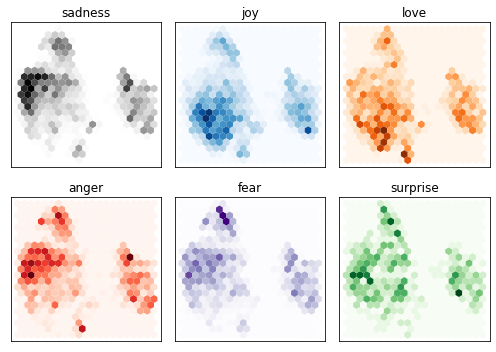

In [83]:
fig, axes = plt.subplots(2, 3, figsize = (7, 5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap = cmap, gridsize = 20, linewidths = (0, ))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

From this plot we can see some clear patterns. 

1. The negative feelings such as sadness, anger, and fear all occupy similar regions with slightly varying distributions.
2. joy and love are well separated from the negative emotions and also share a similar space.
3. surprise is scattered all over the place. 

Although we may have hoped for some separation, this is no way guarenteed since the model was not trained to know the difference between these emotions. It only learned them implicitly by guessing the masked words in the texts.

Let's train the model -

We will use the last hidden state as the feature set and then use logistic regression to train the model

In [84]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [85]:
lr_clf.score(X_valid, y_valid) # Return the mean accuracy on the given test data and labels.

0.633

Looking at the accuracy, it might appear that our model is just a bit better than random, but since we are dealing with an unbalanced multiclass dataset, it's actually significantly better. 

We can examine whether our model is any good by comparing it against a simple baseline. We can use an implementation called DummyClassifer that can be used to build a classifoer with simple heuristic such as always choosing the majority class or always drawing a random class. In this case we will choose the heuristic to always choose the most frequent class.

In [86]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

So, our simple classifier with DistilBERT embeddings is significantly better than our baseline. Let's look at the Confusion Matrix

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize = (6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)
    disp.plot(cmap = "Blues", values_format=".2f", ax = ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

In [88]:
y_preds = lr_clf.predict(X_valid)

In [89]:
y_preds

array([0, 0, 2, ..., 1, 1, 1])

In [90]:
len(y_preds)

2000

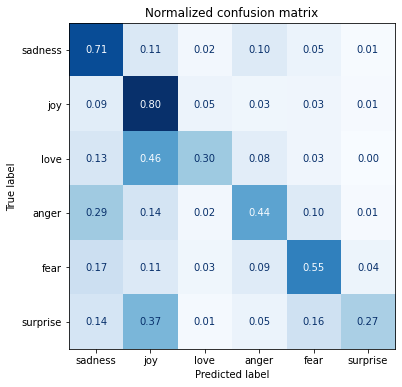

In [91]:
plot_confusion_matrix(y_preds, y_valid, labels)

From the Confusion Matrix we can see that 

1. anger and fear most often get confused with sadness. 
2. love and surprise are often confused with joy.

#### Fine-tuning Transformers

We will fine-tune a transformer end-to-end. With the fine-tuning approach we do not use the hidden states as fixed features, but instead train them. This requires the classification head to be differentiable. Training the hidden states that serve as inputs to the classification model will help us avoid the problem of working with data that may not be well suited for the classification task. Instead, the initial hidden states adapt during training to decrease the model loss and thus increase its performance.

We will be using the AutoModelForSequenceClassification model which has a classification head in top of the pretrained model outputs, which can be easily trained with the base model.

In [105]:
device

device(type='cuda')

In [106]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels).to(device))

To monitor metrics during training, we need to define a compute_metrics() function for the trainer. This function receives an EvalPrediction object (which is a named tuple with predictions and label_ids attributes) and needs to return a dictionary that maps each metric's name to its value. For our application, we will compute the F1 score and accuracy of the model

In [107]:
from sklearn.metrics import accuracy_score, f1_score

In [114]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, "f1": f1}

In [142]:
# Setting up the hyperparameters

from transformers import Trainer, TrainingArguments

In [143]:
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir = 'models/' + model_name,
                                 num_train_epochs = 2,
                                 learning_rate = 2e-5,
                                 per_device_train_batch_size = batch_size,
                                 per_device_eval_batch_size = batch_size,
                                 weight_decay = 0.01,
                                 evaluation_strategy = "epoch",
                                 disable_tqdm = False,
                                 logging_steps = logging_steps
                                 log_level = "error")

In [144]:
from transformers import Trainer

In [147]:
trainer = Trainer(model = model, args = training_args,
                 compute_metrics = compute_metrics,
                 train_dataset = emotions_encoded["train"],
                 eval_dataset = emotions_encoded["validation"],
                 tokenizer = tokenizer)

old_collator = trainer.data_collator
trainer.data_collator = lambda data: dict(old_collator(data))

trainer.train()

Here, we can see that our model has an F1 score on the validation set of around 93 % a significant improvement over the feature based approach.

In [119]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [122]:
preds_output

PredictionOutput(predictions=array([[ 5.4755325 , -1.0525554 , -1.5160828 , -1.6781365 , -1.6722403 ,
        -2.0472393 ],
       [ 5.4530525 , -1.3700646 , -2.2179854 , -1.4153705 , -0.76655394,
        -2.0954235 ],
       [-1.3343694 ,  2.8368037 ,  3.8493173 , -1.5143749 , -2.2933104 ,
        -1.9549633 ],
       ...,
       [-1.2498804 ,  6.0096126 , -0.2807307 , -1.5547038 , -2.120434  ,
        -1.2159611 ],
       [-1.7072979 ,  3.858845  ,  3.3098128 , -1.8337754 , -2.4138606 ,
        -1.7314225 ],
       [-1.3920095 ,  5.808277  ,  0.1550661 , -1.8460215 , -2.2544377 ,
        -0.8619322 ]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.15757645666599274, 'test_accuracy': 0.9325, 'test_f1': 0.9327306200143002, 'test_runtime': 8.2613, 'test_samples_per_second': 242.092, 'test_steps_per_second': 3.873})

In [121]:
preds_output.metrics

{'test_loss': 0.15757645666599274,
 'test_accuracy': 0.9325,
 'test_f1': 0.9327306200143002,
 'test_runtime': 8.2613,
 'test_samples_per_second': 242.092,
 'test_steps_per_second': 3.873}

In [123]:
y_preds = np.argmax(preds_output.predictions, axis = 1)

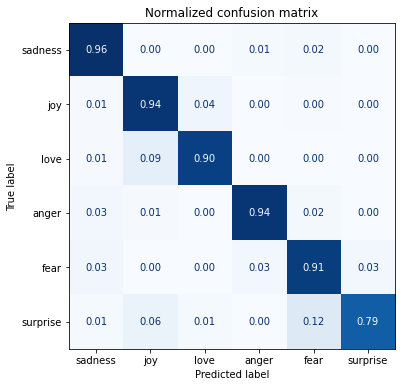

In [124]:
plot_confusion_matrix(y_preds, y_valid, labels)

Looking at the Confusion Matrix, we see it is an ideal diagonal confusion matrix. But the love category is still confused with joy, which is natural. suprised is often confused for joy and fear. Overall the model performance is very good.

Let's do some Error Analysis-

#### Error Analysis

Sort the validation samples by the model loss. When we pass the label during the forward pass, the loss is automatically calculated and returned.

In [125]:
from torch.nn.functional import cross_entropy

In [126]:
def forward_pass_with_label(batch):
    # Place all the input tensors on the same device as the model
    inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    
    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis = -1)
        loss = cross_entropy(output.logits, batch["label"].to(device), reduction = "none")
        
    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

In [127]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [128]:
# compute loss values-

emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched = True, batch_size = 16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [129]:
# Finally we create a Dataframe with the texts, losses and predicted/true labels

In [133]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]

df_test["label"] = df_test["label"].apply(label_int2str)

df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [134]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
1500,i guess we would naturally feel a sense of lon...,anger,sadness,6.496900
1950,i as representative of everything thats wrong ...,surprise,sadness,6.373624
1509,i guess this is a memoir so it feels like that...,joy,fear,6.120400
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.965881
1963,i called myself pro life and voted for perry w...,joy,sadness,5.959797
1111,im lazy my characters fall into categories of ...,joy,fear,5.719789
1757,i feel like there s a reason to buy another to...,anger,joy,5.446516
882,i feel badly about reneging on my commitment t...,love,sadness,5.222472
1840,id let you kill it now but as a matter of fact...,joy,fear,5.093384
1836,i got a very nasty electrical shock when i was...,fear,anger,4.194961


We can clearly see that the model predicted some of the labels incorrectly. On the other hand, it seems that there are quite a few examples with no clear class, which might be either mislabeled or require a new class altogether. In particular, joy seems to be mislabeled several times. With this information we can refine the dataset, which often can lead to as big a performance gain (or more) as having more data or larger models!

In [135]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.003180
856,i feel is more energetic in urban singapore th...,joy,joy,0.003284
19,i had lunch with an old friend and it was nice...,joy,joy,0.003298
620,i shall move right along to the post interview...,joy,joy,0.003316
1513,i have also been getting back into my gym rout...,joy,joy,0.003330
260,i am feeling so invigorated and so ready to ke...,joy,joy,0.003343
578,i got to christmas feeling positive about the ...,joy,joy,0.003353
1780,ive explained that he is very creative and lov...,joy,joy,0.003355
199,i feel invigorated full of energy ready for th...,joy,joy,0.003359
1466,i feel so ungrateful to be wishing this pregna...,sadness,sadness,0.003385


#### Inferencing the Model

I have shared the model on Huggingface Model Hub. Will do the inference 

In [148]:
from transformers import pipeline

In [149]:
model_id = "suvrobaner/distilbert-base-uncased-finetuned-emotion-en-tweets"
classifier = pipeline("text-classification", model = model_id)

Downloading:   0%|          | 0.00/883 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [150]:
custom_tweet = "I saw a movie today and it was really good."

In [151]:
preds = classifier(custom_tweet, return_all_scores=True)

In [154]:
preds[0]

[{'label': 'LABEL_0', 'score': 0.028335537761449814},
 {'label': 'LABEL_1', 'score': 0.9389951229095459},
 {'label': 'LABEL_2', 'score': 0.004737750627100468},
 {'label': 'LABEL_3', 'score': 0.014805243350565434},
 {'label': 'LABEL_4', 'score': 0.008162216283380985},
 {'label': 'LABEL_5', 'score': 0.004964208230376244}]

In [155]:
labels

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

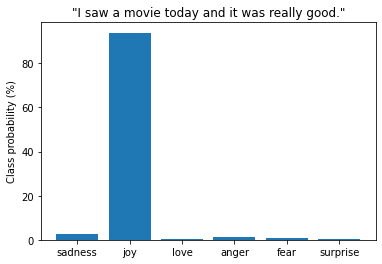

In [153]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()